# verbose script inspecting model state
## _outdated_

In [1]:
from matplotlib import pyplot as plt
from scipy.special import softmax
import numpy as np
from utils import *
import seaborn as sns
sns.set_context('talk')
import time

tstamp = time.perf_counter_ns()

%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
## import human data for fitting
import pandas as pd
hdf = pd.read_csv('../human_data.csv')
hB,hI = hdf.loc[:,('blocked mean','interleaved mean')].values.T

### run full exp

In [3]:
### RUN EXP
ns = 2
schargs = {
  'concentration':1.4, # 
  'stickiness_wi':5000, #
  'stickiness_bt':100, #
  'sparsity':0.08 # 
}

dataL = []
for i in range(ns):
  task = Task()
  sem = SEM(schargs)
  exp,curr  = task.generate_experiment('blocked',160,40)
  data = sem.run_exp(exp)
  data['exp']=exp
  dataL.append(data)

### inspect predictions


In [4]:
def get_sm(xth,norm=True):
  """ 
  given x_t_hat from subject
  [trial,layer,node]
  get 2afc normalized softmax for layer 2/3
  return: [layer2/3,trial,node56/78]
  norm=true 
   apply softmax to xth
   when prediction done with multiple schemas
  """
  nodes = {2:(5,6),3:(7,8)} 
  L = [] # layer 2 and 3
  for l,ns in nodes.items():
    y = xth[:,l,ns]
    if norm:
      y=softmax(y,1)
    L.append(y)
  return np.array(L)

def get_acc(data):
  """ 
  returns 2afc softmax of 
  layer 2/3 transitions
  """
  ysm = get_sm(data['xth'])
  L = []
  for i in range(2):
    ysml = ysm[i,:,:]
    yt = data['exp'][:,i+3] 
    pr_yt = ysml[range(len(ysml)),yt - (5+2*i)] # 
    L.append(pr_yt)
  return np.array(L)

_ = get_acc(data)
_ = get_sm(data['xth'])

### accuracy for prediction following E2 and E3

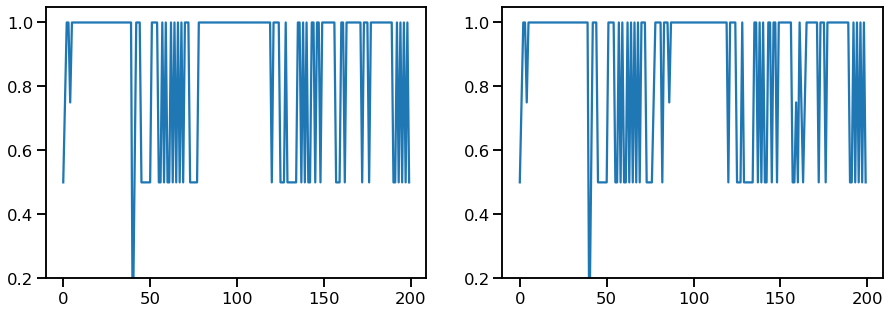

In [5]:
acc = np.array([get_acc(data) for data in dataL]) # sub,layer,trial
f,ax = plt.subplots(1,2,figsize=(15,5),)
for i in range(2):
  M = acc[:,i].mean(0)
  ax[i].plot(M)
  ax[i].set_ylim(0.2,1.05)
plt.savefig('figures/debug/acc_layers-%i'%tstamp)

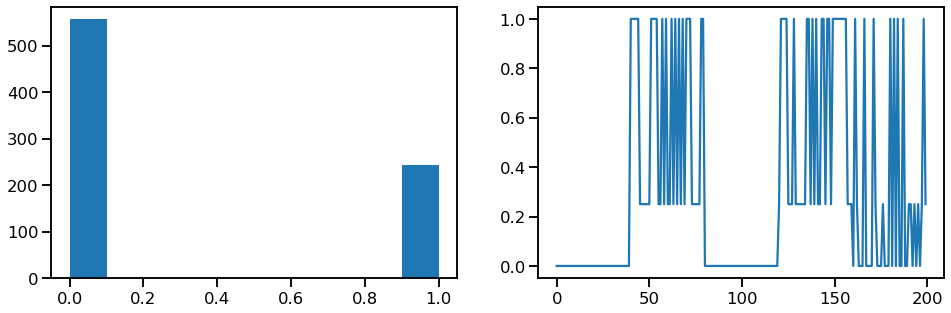

In [6]:
### schema usage
f,ax = plt.subplots(1,2,figsize=(16,5))
zt = data['zt'][:,:-1].flatten()
ax[0].hist(zt)
ax[1].plot(data['zt'][:,:-1].mean(1))

In [7]:
### schema usage
[np.unique(d['zt']) for d in dataL] 

[array([-1.,  0.,  1.]), array([-1.,  0.,  1.])]

In [8]:
[d['zt'] for d in dataL] 
for d in dataL:
  for t,(zt,et) in enumerate(zip(d['zt'],d['exp'])):
    print(t,zt,et)
  

0 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
1 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
2 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
3 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
4 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
5 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
6 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
7 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
8 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
9 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
10 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
11 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
12 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
13 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
14 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
15 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
16 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
17 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
18 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
19 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
20 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
21 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
22 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
23 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
24 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
25 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
26 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
27 [ 0.  0.

In [9]:
for p in data['priors']:
  print(p)

[1.4, 1.4]
[5004, 1.4]
[5008, 1.4]
[5012, 1.4]
[5016, 1.4]
[5020, 1.4]
[5024, 1.4]
[5028, 1.4]
[5032, 1.4]
[5036, 1.4]
[5040, 1.4]
[5044, 1.4]
[5048, 1.4]
[5052, 1.4]
[5056, 1.4]
[5060, 1.4]
[5064, 1.4]
[5068, 1.4]
[5072, 1.4]
[5076, 1.4]
[5080, 1.4]
[5084, 1.4]
[5088, 1.4]
[5092, 1.4]
[5096, 1.4]
[5100, 1.4]
[5104, 1.4]
[5108, 1.4]
[5112, 1.4]
[5116, 1.4]
[5120, 1.4]
[5124, 1.4]
[5128, 1.4]
[5132, 1.4]
[5136, 1.4]
[5140, 1.4]
[5144, 1.4]
[5148, 1.4]
[5152, 1.4]
[5156, 1.4]
[5160, 1.4]
[160, 5004, 1.4]
[160, 5008, 1.4]
[160, 5012, 1.4]
[160, 5016, 1.4]
[160, 5020, 1.4]
[5163, 21, 1.4]
[5166, 22, 1.4]
[5169, 23, 1.4]
[5172, 24, 1.4]
[5175, 25, 1.4]
[5178, 26, 1.4]
[178, 5030, 1.4]
[178, 5034, 1.4]
[178, 5038, 1.4]
[178, 5042, 1.4]
[5181, 43, 1.4]
[5184, 44, 1.4]
[184, 5048, 1.4]
[5187, 49, 1.4]
[187, 5053, 1.4]
[5190, 54, 1.4]
[5193, 55, 1.4]
[193, 5059, 1.4]
[5196, 60, 1.4]
[196, 5064, 1.4]
[5199, 65, 1.4]
[199, 5069, 1.4]
[5202, 70, 1.4]
[202, 5074, 1.4]
[5205, 75, 1.4]
[205, 5079, 1.

In [10]:
for like in data['likesL2']:
  print(like)

[0.5, 0.5]
[0.5, 0.5]
[0.9310344827586208, 0.5]
[0.9310344827586208, 0.5]
[0.9629629629629629, 0.5]
[0.9629629629629629, 0.5]
[0.9746835443037974, 0.5]
[0.9807692307692307, 0.5]
[0.9746835443037974, 0.5]
[0.9844961240310077, 0.5]
[0.987012987012987, 0.5]
[0.9888268156424581, 0.5]
[0.9901960784313726, 0.5]
[0.9912663755458515, 0.5]
[0.9807692307692307, 0.5]
[0.9844961240310077, 0.5]
[0.9921259842519685, 0.5]
[0.987012987012987, 0.5]
[0.992831541218638, 0.5]
[0.9888268156424581, 0.5]
[0.993421052631579, 0.5]
[0.9939209726443768, 0.5]
[0.9901960784313726, 0.5]
[0.9912663755458515, 0.5]
[0.9921259842519685, 0.5]
[0.9943502824858756, 0.5]
[0.9947229551451188, 0.5]
[0.992831541218638, 0.5]
[0.993421052631579, 0.5]
[0.9950495049504949, 0.5]
[0.9953379953379953, 0.5]
[0.9939209726443768, 0.5]
[0.9955947136563875, 0.5]
[0.9943502824858756, 0.5]
[0.9947229551451188, 0.5]
[0.9958246346555323, 0.5]
[0.9960317460317459, 0.5]
[0.9950495049504949, 0.5]
[0.9953379953379953, 0.5]
[0.9955947136563875, 0

In [11]:
for i,po in enumerate(data['postL2']):
  print(i,po)

0 [[0.7, 0.7]]
1 [[2502.0, 0.7]]
2 [[4662.620689655173, 0.7]]
3 [[4666.344827586207, 0.7]]
4 [[4830.222222222222, 0.7]]
5 [[4834.074074074074, 0.7]]
6 [[4896.810126582278, 0.7]]
7 [[4931.307692307692, 0.7]]
8 [[4904.607594936709, 0.7]]
9 [[4957.922480620155, 0.7]]
10 [[4974.545454545455, 0.7]]
11 [[4987.6424581005585, 0.7]]
12 [[4998.509803921569, 0.7]]
13 [[5007.8777292576415, 0.7]]
14 [[4958.7692307692305, 0.7]]
15 [[4981.550387596899, 0.7]]
16 [[5024.1259842519685, 0.7]]
17 [[5002.181818181818, 0.7]]
18 [[5035.641577060932, 0.7]]
19 [[5019.284916201117, 0.7]]
20 [[5046.578947368421, 0.7]]
21 [[5053.0942249240115, 0.7]]
22 [[5038.117647058823, 0.7]]
23 [[5047.528384279476, 0.7]]
24 [[5055.8740157480315, 0.7]]
25 [[5071.186440677966, 0.7]]
26 [[5077.065963060686, 0.7]]
27 [[5071.383512544803, 0.7]]
28 [[5078.368421052632, 0.7]]
29 [[5090.6732673267325, 0.7]]
30 [[5096.130536130536, 0.7]]
31 [[5092.851063829787, 0.7]]
32 [[5105.409691629955, 0.7]]
33 [[5103.005649717514, 0.7]]
34 [[510